## Lab Assignment: Advanced Data Visualization with Seaborn, Plotly, and MatPlotLib
Student:     **Michael Kamp**

### Objective: To apply knowledge of more advanced data visualizations using some of the additional standard Python libraries.

### Instructions:
In this lab assignment, you will be given the following eight problems to solve. Each problem requires you to implement a solution using one of the named visualization libraries in Python. Read the problem statement carefully and make sure you understand the requirements before starting to code.
1. Load the dataset titanic.csv using Pandas
2. Create a bar plot using Seaborn to visualize the count of passengers in each passenger class (Pclass) in the Titanic dataset. Label the x-axis, y-axis, and add a title to the plot.
3. Use Plotly to create an interactive scatter plot to visualize the relationship between the age and fare paid by passengers in the Titanic dataset. Include tooltips that display additional information about each data point when hovering over them.
4. Create a histogram using Matplotlib to visualize the distribution of passenger ages in the Titanic dataset. Customize the bin size, color, and transparency of the bars.
5. Use Seaborn to create a box plot to compare the fare distribution across different passenger classes (Pclass) in the Titanic dataset. Add labels to the x-axis and y-axis, and include a legend to indicate the passenger classes.
6. Create a line plot using Plotly to display the survival rate of passengers based on their age in the Titanic dataset. Group the data by age range and calculate the survival rate for each group. Add a title and axis labels to the plot.
7. Use Matplotlib to create a stacked bar plot to visualize the survival count of passengers in different passenger classes (Pclass) and embarkation ports (Embarked) in the Titanic dataset. Customize the colors, add a legend, and include a title for the plot.
8. Create a heat map using Seaborn to visualize the correlation matrix of numerical variables in the Titanic dataset, such as age, fare, and number of siblings/spouses aboard (SibSp). Customize the color palette and add annotations to the cells to display the correlation values.

### Deliverable:
Modify this notebook to include the python code as well as any documentation related to your submission.  Submit the notebook as your response in Blackboard.

### Grading Criteria:

Your lab assignment will be graded based on the following criteria:

- Correctness of the implementation
- Proper use of basic control structures and functions
- Code efficiency
- Clarity and readability of the code
- Compliance with the instructions and deliverables.

### Student Submission

 1) Load and Inspect the Dataset

In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Load required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic dataset
titanic = sns.load_dataset("titanic")

# Confirm dataset loaded
print("Titanic dataset loaded successfully!")
print(titanic.shape)


Titanic dataset loaded successfully!
(891, 15)


2: Create Bar plat for Passenger Count by Class

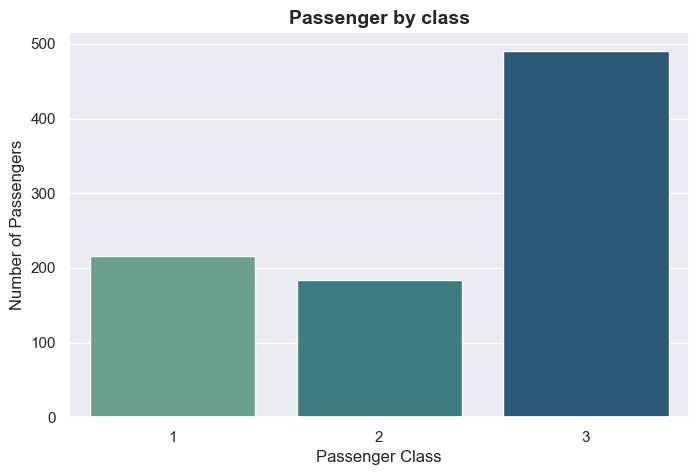

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create Seaborn bar plot
sns.set_theme(style="darkgrid")
plt.figure(figsize=(8, 5))
sns.countplot(data=titanic, x="pclass", palette="crest")
# Add Lables and title
plt.title("Passenger by class", fontsize=14, weight="bold")
plt.xlabel("Passenger Class")
plt.ylabel("Number of Passengers")
plt.show()


3: Interactive Scatter Plot (Age vs Fare) with Plotly

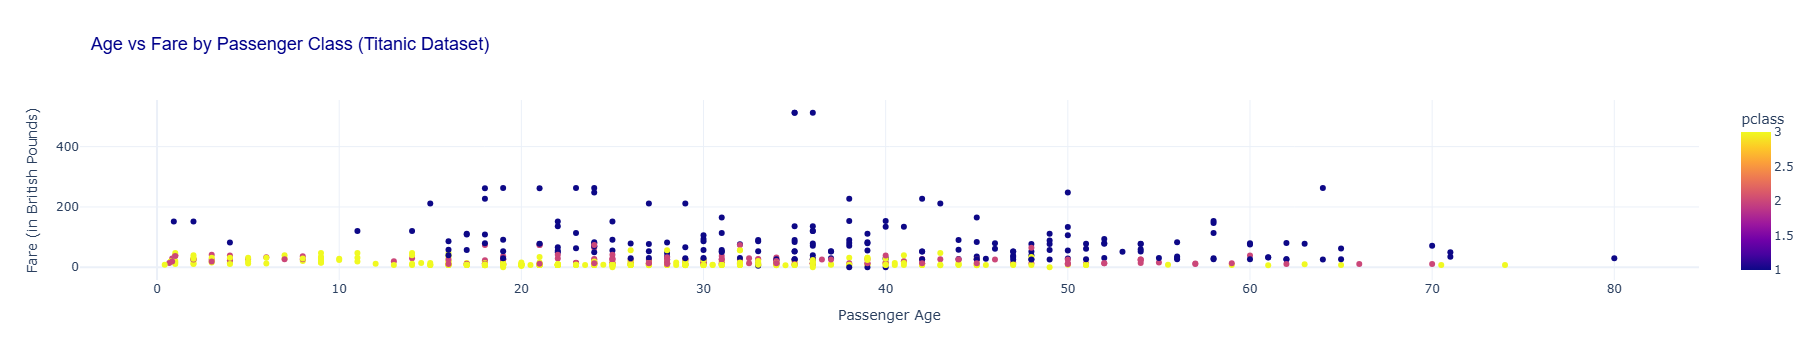

In [3]:
import plotly.express as px
# Create scatter plot
fig = px.scatter(
    titanic, 
    x="age",
    y="fare",
    color ="pclass",
    hover_data=["pclass", "fare", "survived"],
    title= "Age vs Fare by Passenger Class (Titanic Dataset)",
)

# Set up layout of scatter plot
fig.update_layout(
    xaxis_title="Passenger Age",
    yaxis_title="Fare (in British Pounds)",
    title_font=dict(size=18, family="Arial", color="darkblue"),
    template="plotly_white"                
)

# Show plot
fig.show()


4: Histogram of Passenger Ages (Matplotlib)

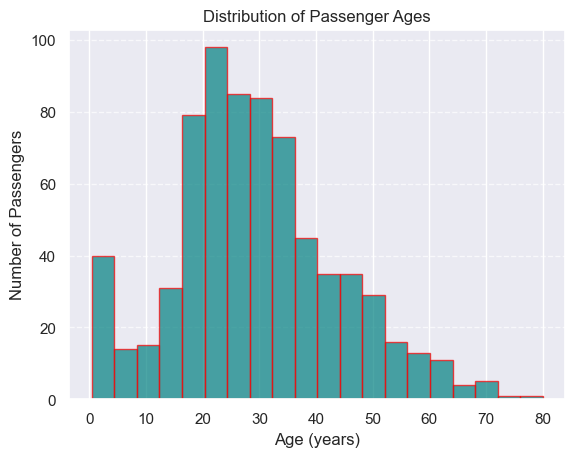

In [4]:
import matplotlib.pyplot as plt

# Create histogram for Titanic
plt.hist(titanic["age"].dropna(), bins=20, color="teal", edgecolor="red", alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels and titles
plt.title("Distribution of Passenger Ages"),
plt.xlabel("Age (years)"),
plt.ylabel("Number of Passengers")

# Display plot
plt.show()


5: Box Plot of Fare Distribution by Passenger Class

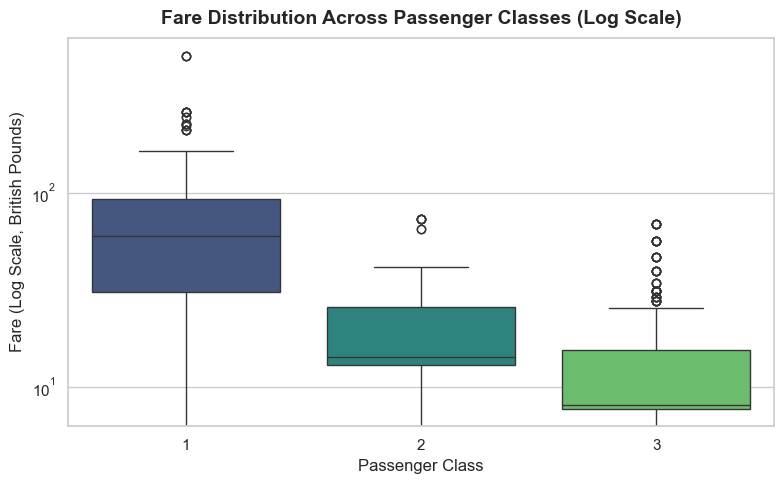

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set consistent Seaborn theme
sns.set_theme(style="whitegrid", palette="viridis")

# Create the figure
plt.figure(figsize=(8, 5))

# Box plot of fare by passenger class
sns.boxplot(
    data=titanic,
    x="pclass",
    y="fare",
    palette="viridis"
)

# Apply log scale to reduce clutter from outliers
plt.yscale("log")

# Add titles and axis labels
plt.title("Fare Distribution Across Passenger Classes (Log Scale)", fontsize=14, weight="bold", pad=10)
plt.xlabel("Passenger Class", fontsize=12)
plt.ylabel("Fare (Log Scale, British Pounds)", fontsize=12)

# Optional: tighten layout for better spacing
plt.tight_layout()

# Display plot
plt.show()


6: Line Plot of Survival Rate by Age Group (Plotly)

In [6]:
import plotly.express as px
import pandas as pd

# Create age bins (intervals) for grouping
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ["0-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79"]

titanic["age_group"] = pd.cut(titanic["age"], bins=bins, labels=labels, right=False)

# Calculate survival rate for each age group
survival_by_age = (
    titanic.groupby("age_group")["survived"]
    .mean()
    .reset_index()
    .rename(columns={"survived": "survival_rate"})
)

# Create the line chart with Plotly
fig = px.line(
    survival_by_age,
    x="age_group",
    y="survival_rate",
    markers=True,
    title="Survival Rate by Age Group (Titanic Dataset)",
)

# Customize chart layout

fig.update_layout(
    xaxis_title="Age Group (Years)",
    yaxis_title="Survival Rate",
    yaxis_tickformat=".0%",
    template="plotly_white",
    title_font=dict(size=18, family="Arial", color="darkblue"),
)

# Show the chart

fig.show()


7: Stacked Bar Plot of Survival Count by Passenger Class and Embarkation Port (Matplotlib)

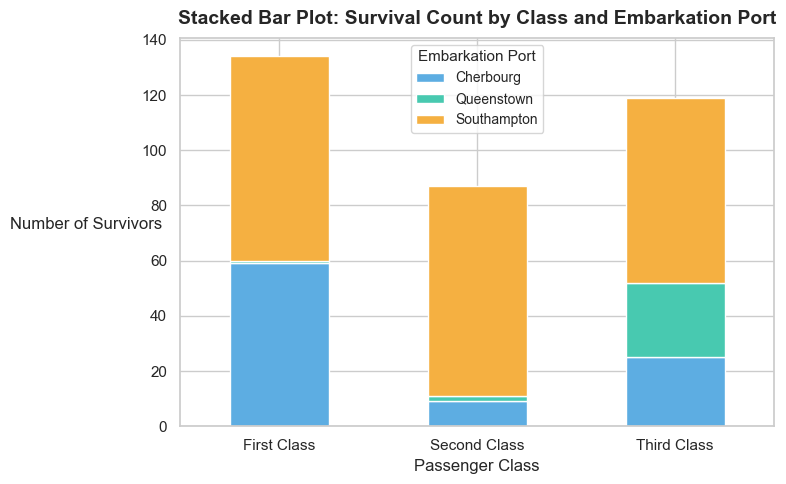

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Prepare grouped data
survival_counts = titanic.groupby(['pclass', 'embarked'])['survived'].sum().unstack()

# Rename embarkation codes for clarity
survival_counts.rename(
    columns={'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'},
    inplace=True
)

# Create stacked bar plot and assign it to 'ax'
ax = survival_counts.plot(
    kind='bar',
    stacked=True,
    color=['#5DADE2', '#48C9B0', '#F5B041'],
    figsize=(8, 5)
)        
     
# Customize tick labels (replace 1, 2, 3)
ax.set_xticklabels(['First Class', 'Second Class', 'Third Class'], rotation=0)

# Add labels and title
plt.title("Stacked Bar Plot: Survival Count by Class and Embarkation Port", fontsize=14, weight='bold', pad=10)
plt.xlabel("Passenger Class", fontsize=12)
plt.ylabel("Number of Survivors", fontsize=12, rotation=0, labelpad=40)

# Add legend with full names
plt.legend(title="Embarkation Port", title_fontsize=11, fontsize=10, loc="upper center")

# Optional: improve spacing
plt.tight_layout()

# Display plot
plt.show()


8: Correlation Heatmap of Numeric Variables (Seaborn)

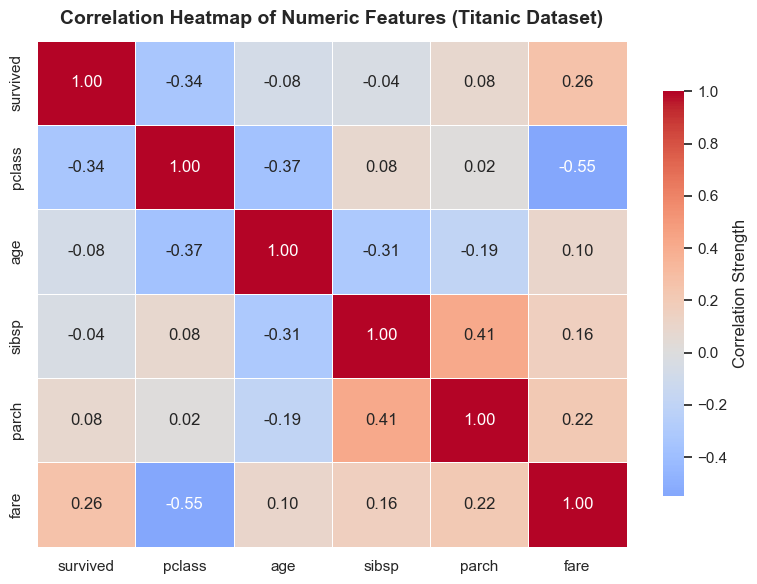

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns from the Titanic dataset
numeric_titanic = titanic.select_dtypes(include=["number"])

# Compute correlation matrix
corr_matrix = numeric_titanic.corr()

# Set up the figure and Seaborn style
plt.figure(figsize=(8, 6))
sns.set_theme(style="white")

# Create heatmap
sns.heatmap(
    corr_matrix,
    annot=True,          
    cmap="coolwarm",    
    center=0,           
    fmt=".2f",          
    linewidths=0.5,      
    cbar_kws={"shrink": 0.8, "label": "Correlation Strength"}
)

# Add title
plt.title("Correlation Heatmap of Numeric Features (Titanic Dataset)", fontsize=14, weight="bold", pad=12)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

9: Identify Top Correlations with Survival

In [9]:
# Calculate correlations with 'survived'
survival_corr = corr_matrix["survived"].sort_values(ascending=False)

# Display top positive and negative correlations
print("🔎 Top correlations with passenger survival:\n")
print(survival_corr)

# Optional: display only strongest relationships in a neat format
print("\n📊 Key insights:")
print(f"• Fare vs Survival: {survival_corr['fare']:.2f} (Higher fare = more likely to survive)")
print(f"• Pclass vs Survival: {survival_corr['pclass']:.2f} (Higher class number = less likely to survive)")
print(f"• Age vs Survival: {survival_corr['age']:.2f} (Older passengers slightly less likely to survive)")

🔎 Top correlations with passenger survival:

survived    1.000000
fare        0.257307
parch       0.081629
sibsp      -0.035322
age        -0.077221
pclass     -0.338481
Name: survived, dtype: float64

📊 Key insights:
• Fare vs Survival: 0.26 (Higher fare = more likely to survive)
• Pclass vs Survival: -0.34 (Higher class number = less likely to survive)
• Age vs Survival: -0.08 (Older passengers slightly less likely to survive)
